# Data preperation


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_audio_features = pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/Machine_learning/df_audio_features_5000/df_audio_features_5000.csv")

In [14]:
# removing whitespaces from coloumnnames (both from left and rightside,)
df_audio_features.columns  = df_audio_features.columns.str.replace("^[ ]+|[ ]+$", "", regex=True)

In [15]:
# dropping unnecesary coloumns
df_audio_features = df_audio_features.drop(['type', 'id', 'html'], axis = 1)
df_audio_features.shape

(5235, 15)

In [16]:
# setting index of the first rwo coloumns
df_audio_features = df_audio_features.set_index(['name', 'artist'])
df_audio_features.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4


In [17]:
# removing outliers from the complete dataset
from scipy import stats
df_audio_filtered = df_audio_features[(np.abs(stats.zscore(df_audio_features))< 3).all(axis=1)]
df_audio_filtered.shape

(4747, 13)

# Assuming number of clusters (n) = 50

# MIN_MAX scaler

Scaling the dataset using min_max scaler


In [18]:
# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler

# 2. Initialise and fit the transformer and transform the data
df_audio_filtered_minmax = MinMaxScaler().fit_transform(df_audio_filtered)

# 3. convert scaled data into dataframe
scaled_audio_df_minmax = pd.DataFrame(df_audio_filtered_minmax, index=df_audio_filtered.index,
             columns=df_audio_filtered.columns)

scaled_audio_df_minmax.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.751491,0.398807,0.181818,0.526649,1.0,0.043892,0.218090,0.000002,0.154725,0.696749,0.510537,0.256812,0.5
Mulher Eu Sei,Chico César,0.710625,0.049313,0.363636,0.341579,1.0,0.089612,0.883417,0.000041,0.603929,0.521238,0.397299,0.247708,0.5
Rosa Morena,Kurt Elling,0.650983,0.118250,0.545455,0.284322,1.0,0.056328,0.920603,0.000348,0.149895,0.394537,0.485092,0.388865,0.5
Desafinado,Stan Getz,0.446653,0.145303,0.272727,0.362390,1.0,0.154718,0.935678,0.156345,0.154725,0.416346,0.621347,0.349654,0.5
Madalena,Maria Gasolina,0.677491,0.206425,1.000000,0.486921,0.0,0.116679,0.967839,0.420305,0.162776,0.687403,0.314896,0.181466,0.5


In [19]:
#KMeans Cluster
# 1. import the module for KMeans
from sklearn.cluster import KMeans

# 2. initialise anf fit the model data
df_audio_filtered_Kmeans_minmax = KMeans(n_clusters = 30).fit(df_audio_filtered_minmax) # pass your scaled data here
print(df_audio_filtered_Kmeans_minmax)

# 3. obtain the clusters for each datapoint 
cluster_minmax = df_audio_filtered_Kmeans_minmax.labels_

# 4. and merge it into the dataframe of scaled data
scaled_audio_df_minmax["cluster_minmax"] = cluster_minmax

scaled_audio_df_minmax.head()

KMeans(n_clusters=30)


,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_minmax
name,artist,,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.751491,0.398807,0.181818,0.526649,1.0,0.043892,0.218090,0.000002,0.154725,0.696749,0.510537,0.256812,0.5,2
Mulher Eu Sei,Chico César,0.710625,0.049313,0.363636,0.341579,1.0,0.089612,0.883417,0.000041,0.603929,0.521238,0.397299,0.247708,0.5,9
Rosa Morena,Kurt Elling,0.650983,0.118250,0.545455,0.284322,1.0,0.056328,0.920603,0.000348,0.149895,0.394537,0.485092,0.388865,0.5,26
Desafinado,Stan Getz,0.446653,0.145303,0.272727,0.362390,1.0,0.154718,0.935678,0.156345,0.154725,0.416346,0.621347,0.349654,0.5,9
Madalena,Maria Gasolina,0.677491,0.206425,1.000000,0.486921,0.0,0.116679,0.967839,0.420305,0.162776,0.687403,0.314896,0.181466,0.5,15


In [20]:
# centroid
centroids_minmax = df_audio_filtered_Kmeans_minmax.cluster_centers_
centroids_minmax = pd.DataFrame(centroids_minmax)
centroids_minmax.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.356736,0.180963,0.710909,0.339244,1.000000e+00,0.091452,0.933920,0.873949,0.179454,0.217376,0.434711,0.377460,0.500000
1,0.625774,0.513819,0.318545,0.643057,-3.330669e-16,0.121943,0.612671,0.032578,0.223836,0.602330,0.448364,0.328159,0.484000
2,0.694608,0.738171,0.123186,0.716920,1.000000e+00,0.118639,0.129235,0.018037,0.207895,0.789838,0.502333,0.294273,0.495114
3,0.216590,0.908288,0.714342,0.677468,1.000000e+00,0.289047,0.008667,0.809421,0.290005,0.207719,0.469265,0.362118,0.500000
4,0.700790,0.731841,0.709148,0.731397,1.000000e+00,0.146470,0.106580,0.014005,0.166143,0.753172,0.474818,0.295560,0.500000


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,1.547415e+00,1.622830,1.255426,1.515988e+00,1.629316,1.812431,1.264459,1.595579,0.999268,...,1.895433,0.592208,1.367995,1.516383,1.276782,1.756683,0.893142,1.805837,0.544333,1.559176
1,1.547415,2.980232e-08,1.171420,1.624515,1.224219e+00,1.162723,0.721995,1.021871,1.389727,1.170417,...,0.802247,1.564761,1.251028,1.186631,1.378912,0.814403,1.189769,1.012307,1.644599,1.244261
2,1.622830,1.171420e+00,0.000000,1.276579,5.906046e-01,1.475410,1.193407,0.584770,0.817217,1.119046,...,1.225142,1.594210,0.792463,0.440567,0.812705,1.288057,1.175570,1.399074,1.720040,0.637240
3,1.255426,1.624515e+00,1.276579,0.000000,1.117337e+00,1.092679,1.517435,1.375342,0.894840,1.486719,...,1.555823,1.427476,0.901143,1.101705,0.678883,1.362441,1.311154,1.232537,1.396394,1.099927
4,1.515988,1.224219e+00,0.590605,1.117337,4.214685e-08,1.515207,1.006823,0.821474,0.957385,1.229068,...,1.174928,1.696291,0.470043,0.720058,0.846910,1.091442,0.988292,1.283713,1.673879,0.504749


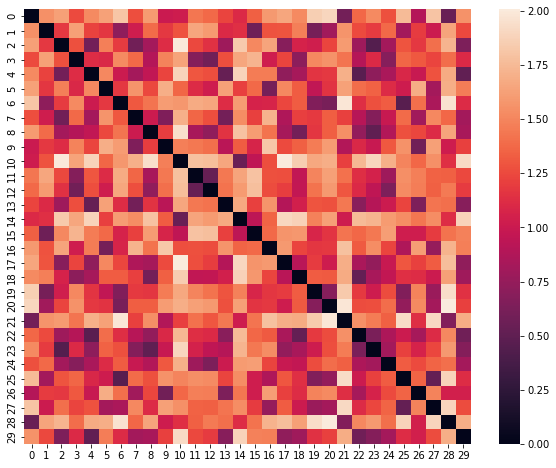

In [21]:
from sklearn.metrics import pairwise_distances
# Euclidean (by default)

euclidean_distance_minmax = pd.DataFrame(pairwise_distances(centroids_minmax), index=centroids_minmax.index,
                                  columns=centroids_minmax.index)


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(euclidean_distance_minmax)
euclidean_distance_minmax.head()

In [22]:
df_audio_filtered_Kmeans_minmax.inertia_

1111.9007631096727

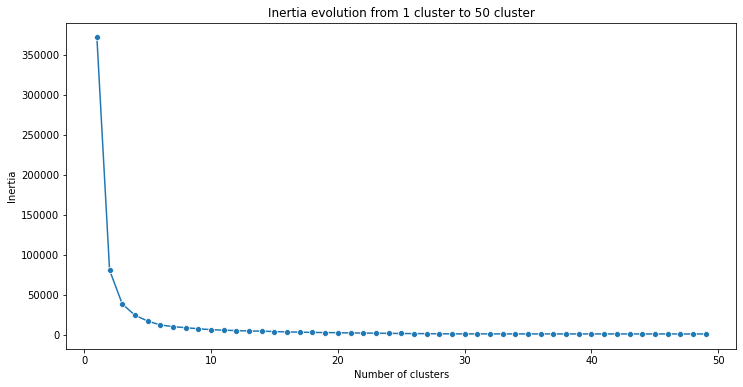

In [23]:
max_k = 50
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(scaled_audio_df_minmax).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Checking correlation between features


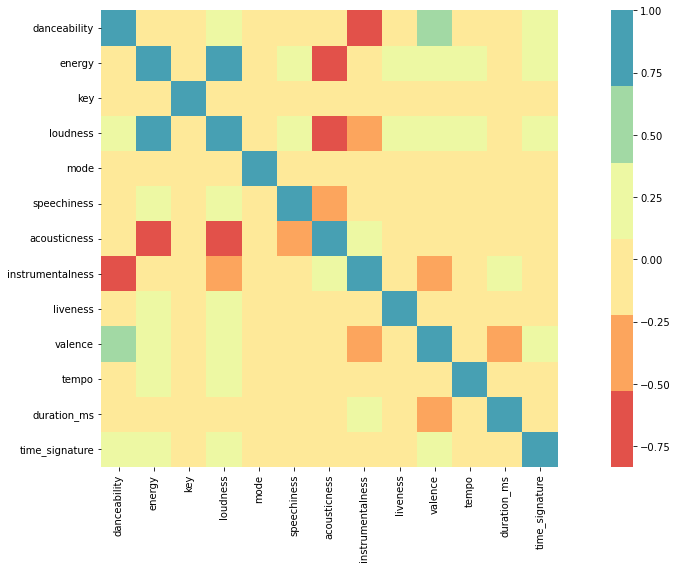

In [24]:
# creating a correlation matrix
corr = df_audio_filtered.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(15,8))
cmap = sns.color_palette("Spectral")

sns.heatmap(corr,cmap = cmap, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

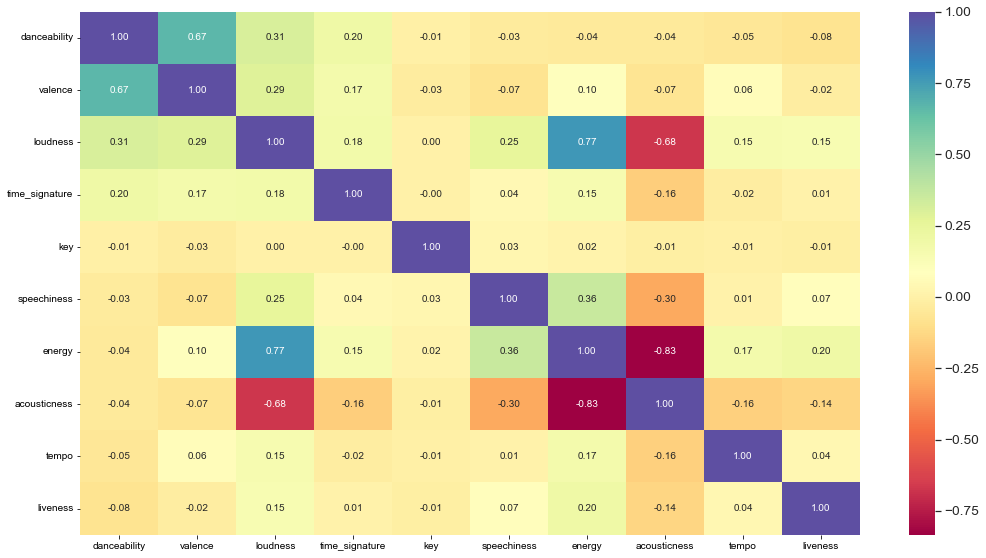

In [25]:
# focused heatmap - danceability
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'danceability')['danceability'].index
cm = np.corrcoef(df_audio_filtered[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = "Spectral", cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

### Now considering n =5






KMeans(n_clusters=5)


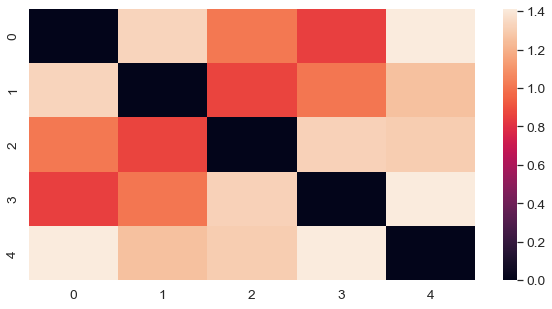

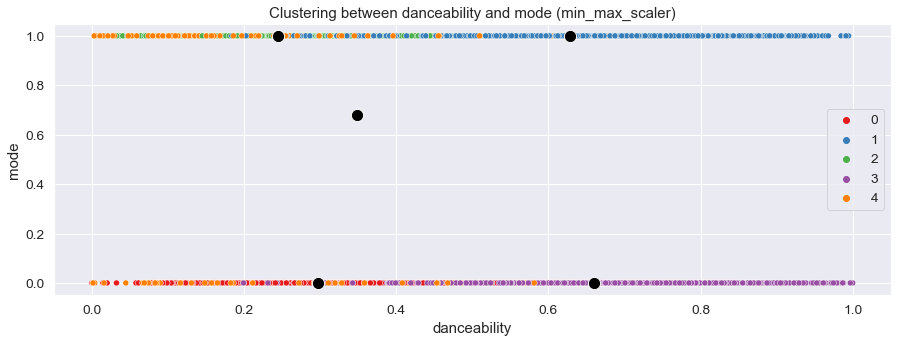

In [26]:
# Dancibiltiy and mode Minmax

#KMeans minmax scaler
from sklearn.cluster import KMeans
df_audio_filtered_Kmeans_new_minmax = KMeans(n_clusters = 5).fit(df_audio_filtered_minmax)
print(df_audio_filtered_Kmeans_new_minmax)

scaled_audio_df_minmax["cluster_new_minmax"] = df_audio_filtered_Kmeans_new_minmax.labels_
scaled_audio_df_minmax.head()

# centroid

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
centroids_new_minmax = df_audio_filtered_Kmeans_new_minmax.cluster_centers_
centroids_new_minmax = pd.DataFrame(centroids_new_minmax)
centroids_new_minmax.columns = columns
centroids_new_minmax.head()
# detemining eucledian distance
from sklearn.metrics import pairwise_distances

# Euclidean (by default)
euclidean_distance_new_minmax = pd.DataFrame(pairwise_distances(centroids_new_minmax), index=centroids_new_minmax.index,
                                  columns=centroids_new_minmax.index)


fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(euclidean_distance_new_minmax)

# dancability and mode -minmax graph
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data= scaled_audio_df_minmax , x='danceability', y='mode', hue='cluster_new_minmax', palette='Set1')
sns.scatterplot(data=centroids_new_minmax, x='danceability', y='mode', color='black', s=150)
plt.title("Clustering between danceability and mode (min_max_scaler)")
plt.show()

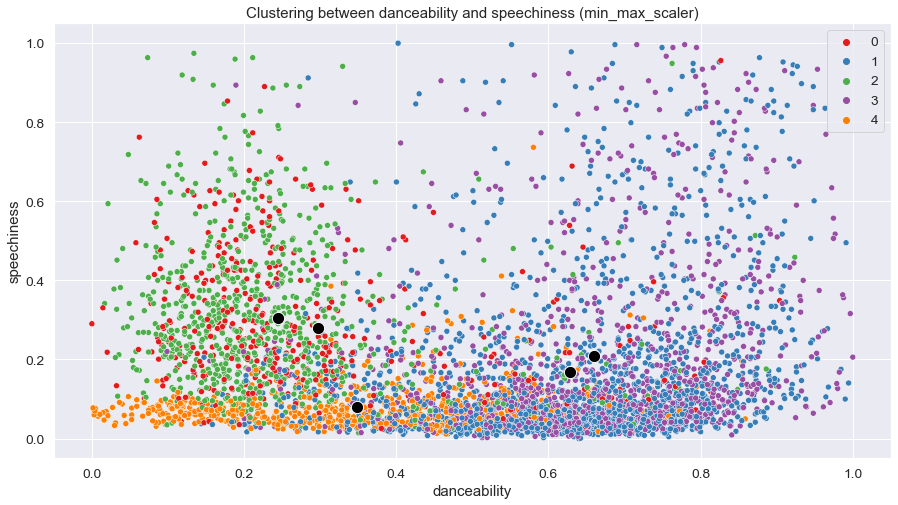

In [27]:
# dancability and speechiness -minmax graph

fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_minmax, x='danceability', y='speechiness', hue='cluster_new_minmax', palette='Set1')
sns.scatterplot(data=centroids_new_minmax, x='danceability', y='speechiness', color='black', s=150)
plt.title("Clustering between danceability and speechiness (min_max_scaler)")
plt.show()

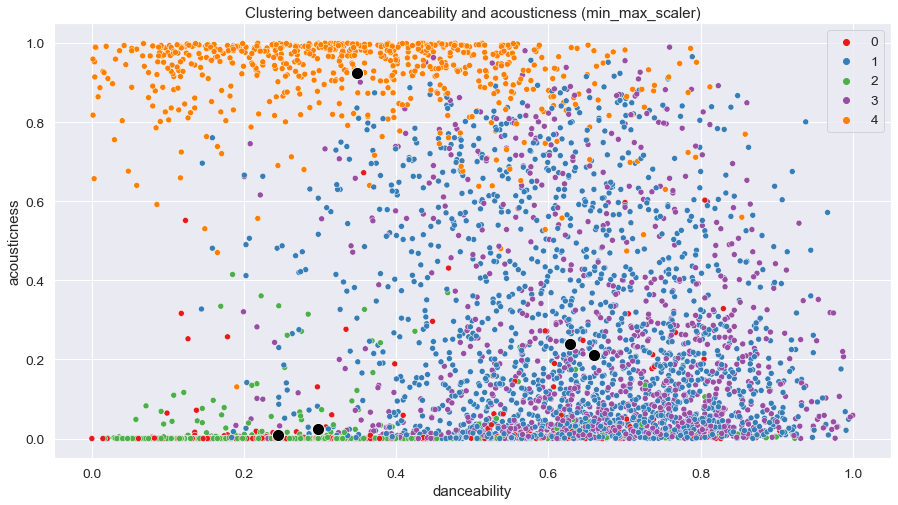

In [28]:
# dancability and acousticness - min_max graph
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_minmax, x='danceability', y='acousticness', hue='cluster_new_minmax', palette='Set1')
sns.scatterplot(data=centroids_new_minmax, x='danceability', y='acousticness', color='black', s=150)
plt.title("Clustering between danceability and acousticness (min_max_scaler)")
plt.show()


In [29]:
# grouping songs based on the cluster and checking number of songs in each cluster- minmax scaler
clustered_minmax_songs= (
scaled_audio_df_minmax.reset_index()
    .groupby(['cluster_new_minmax'])
    .agg({'name':'count'}) 
    .reset_index()
    .sort_values('name', ascending=False)
)
clustered_minmax_songs
# renaming the coloumns
clustered_minmax_songs.rename(columns = {'name':'model_1(minmax)', 'cluster_new_minmax':'cluster'}, inplace = True)

clustered_minmax_songs

,cluster,model_1(minmax)
1,1,1823
3,3,1058
2,2,815
4,4,658
0,0,393


## silhouette_score for minmax scaler

In [30]:
# for min max scaler
from sklearn.metrics import silhouette_score
silhouette_score(df_audio_filtered_minmax, df_audio_filtered_Kmeans_new_minmax.labels_)

0.2532780213006732

# Using Standard Scaler

In [31]:
# standard scaler
from sklearn.preprocessing import StandardScaler

df_audio_filtered_standard = StandardScaler().fit_transform(df_audio_filtered)
df_audio_filtered_standard
scaled_audio_df_standard = pd.DataFrame(df_audio_filtered_standard, index=df_audio_filtered.index,
             columns=df_audio_filtered.columns)
scaled_audio_df_standard.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,1.041118,-1.001827,-0.910298,-0.780569,0.733647,-0.769630,-0.152239,-0.673277,-0.557891,0.867386,0.212277,-0.597075,0.222956
Mulher Eu Sei,Chico César,0.869606,-2.282372,-0.351753,-1.864386,0.733647,-0.540088,1.782664,-0.673171,1.900034,0.254700,-0.447534,-0.671580,0.222956
Rosa Morena,Kurt Elling,0.619292,-2.029788,0.206792,-2.199697,0.733647,-0.707195,1.890808,-0.672337,-0.584320,-0.187593,0.064012,0.483684,0.222956
Desafinado,Stan Getz,-0.238268,-1.930663,-0.631026,-1.742508,0.733647,-0.213220,1.934651,-0.249059,-0.557891,-0.111461,0.857941,0.162771,0.222956
Madalena,Maria Gasolina,0.730543,-1.706714,1.603156,-1.013226,-1.363054,-0.404199,2.028181,0.467162,-0.513842,0.834758,-0.927676,-1.213723,0.222956


KMeans(n_clusters=5)


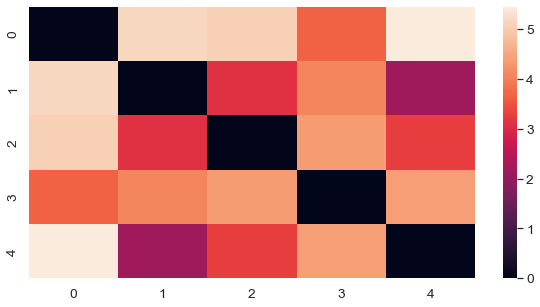

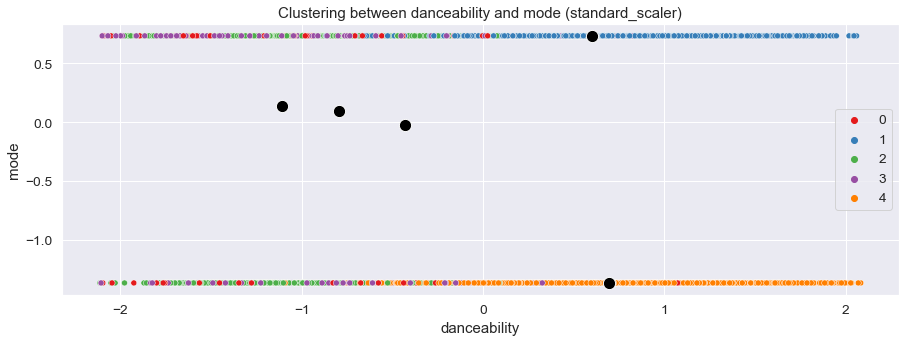

In [32]:
# KMeans standard scaler
from sklearn.cluster import KMeans
df_audio_filtered_Kmeans_new_standard = KMeans(n_clusters = 5).fit(df_audio_filtered_standard)
print(df_audio_filtered_Kmeans_new_standard)

scaled_audio_df_standard["cluster_new_standard"] = df_audio_filtered_Kmeans_new_standard.labels_
scaled_audio_df_standard.head()

scaled_audio_df_standard.groupby(by="cluster_new_standard").mean() 

#centroid

columns =  ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
centroids_new_standard = df_audio_filtered_Kmeans_new_standard.cluster_centers_
centroids_new_standard = pd.DataFrame(centroids_new_standard)
centroids_new_standard.columns = columns
centroids_new_standard.head()

# Euclidean (by default)
euclidean_distance_standard = pd.DataFrame(pairwise_distances(centroids_new_standard), index=centroids_new_standard.index,
                                  columns=centroids_new_standard.index)


fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(euclidean_distance_standard)


# dancability and mode -standard graph
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=scaled_audio_df_standard, x='danceability', y='mode', hue='cluster_new_standard', palette='Set1')
sns.scatterplot(data=centroids_new_standard, x='danceability', y='mode', color='black', s=150)
plt.title("Clustering between danceability and mode (standard_scaler)")
plt.show()


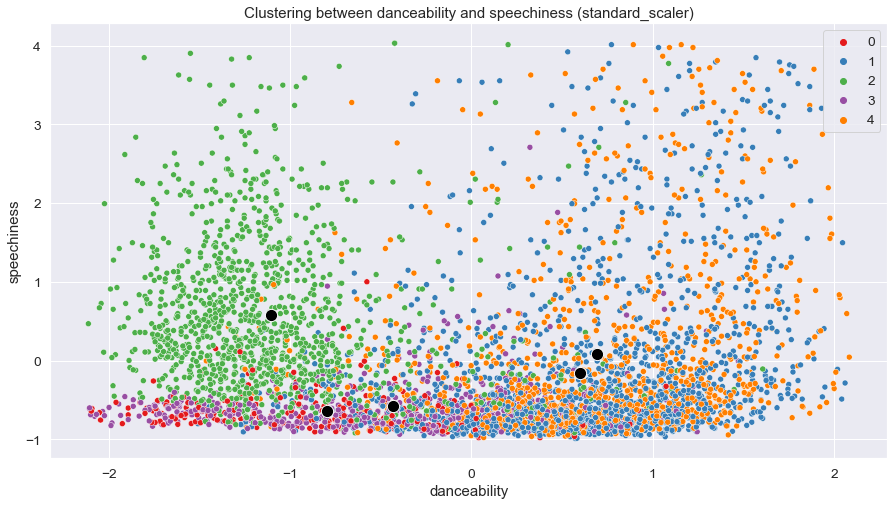

In [33]:
# dancability and speechiness -standard graph
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_standard, x='danceability', y='speechiness', hue='cluster_new_standard', palette='Set1')
sns.scatterplot(data=centroids_new_standard, x='danceability', y='speechiness', color='black', s=150)
plt.title("Clustering between danceability and speechiness (standard_scaler)")
plt.show()

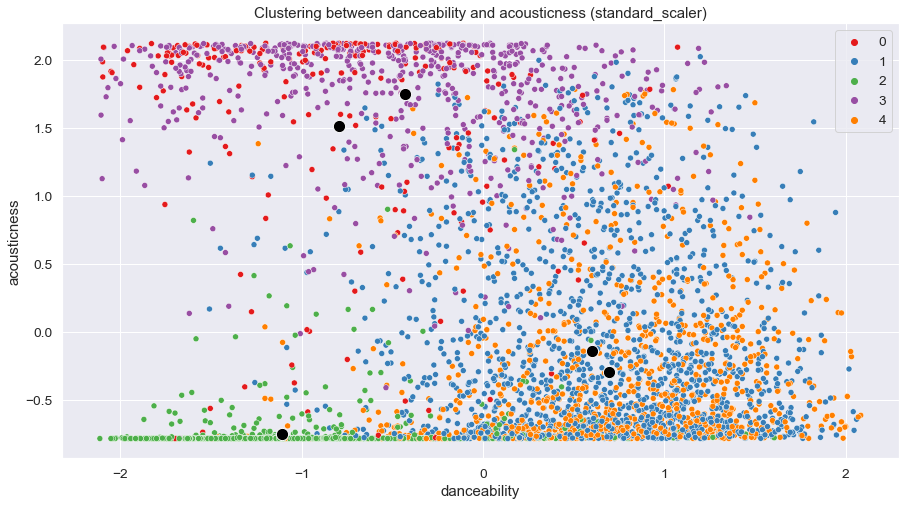

In [34]:
#dancability and acousticness -standard graph
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_standard, x='danceability', y='acousticness', hue='cluster_new_standard', palette='Set1')
sns.scatterplot(data=centroids_new_standard, x='danceability', y='acousticness', color='black', s=150)
plt.title("Clustering between danceability and acousticness (standard_scaler)")
plt.show()

In [35]:
# grouping songs based on the cluster and checking number of songs in each cluster-Standard Scaler
clustered_standard_songs= (
scaled_audio_df_standard.reset_index()
    .groupby(['cluster_new_standard'])
    .agg({'name':'count'}) 
    .reset_index()
    .sort_values('name', ascending=False)
  
)

# renaming the coloumns
clustered_standard_songs.rename(columns = {'name':'model_2(standard)', 'cluster_new_standard':'cluster'}, inplace = True)

clustered_standard_songs

,cluster,model_2(standard)
1,1,1696
2,2,1164
4,4,1040
3,3,615
0,0,232


# silhoutte scores for standard scaler

In [36]:
# silhoutte scores for standard scaler

from sklearn.metrics import silhouette_score
silhouette_score(df_audio_filtered_standard, df_audio_filtered_Kmeans_new_standard.labels_)

0.14843581728744945

# Using Robust Scaler

In [37]:
df_audio_features_robust = df_audio_features
# for robust scaler
from sklearn.preprocessing import RobustScaler
df_audio_filtered_robust = RobustScaler().fit_transform(df_audio_features_robust)
scaled_audio_df_robust = pd.DataFrame(df_audio_filtered_robust, index=df_audio_features.index,
             columns=df_audio_features.columns)
scaled_audio_df_robust.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.313984,-1.157005,1.000000,-0.955541,-1.0,0.246438,1.063138,-0.002833,5.882353,-0.230769,-0.232633,0.385983,0.0
Saudade De Bahia,Antônio Carlos Jobim,0.535620,-0.818841,-0.500000,-0.874033,0.0,-0.355407,0.215967,-0.002921,-0.124567,0.573805,0.154816,-0.401326,0.0
"Canta Canta, Minha Gente",Martinho Da Vila,0.823219,-0.019324,-0.500000,-0.610901,0.0,4.881811,0.635112,-0.002825,-0.006920,1.014553,-0.673325,-0.885854,0.0
Mulher Eu Sei,Chico César,0.437995,-1.661353,-0.166667,-1.774576,0.0,-0.145851,1.391706,-0.002861,1.806228,0.222453,-0.327071,-0.470335,0.0
Rosa Morena,Kurt Elling,0.295515,-1.495169,0.166667,-2.053186,0.0,-0.298407,1.457419,-0.002390,-0.145329,-0.031185,0.046532,0.599701,0.0


KMeans(n_clusters=5)


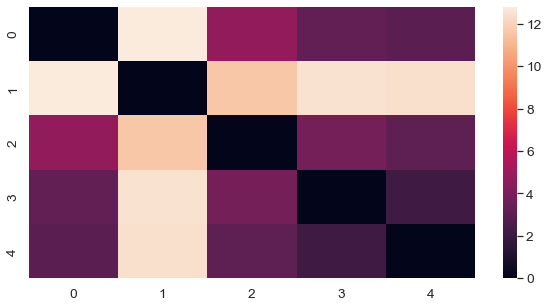

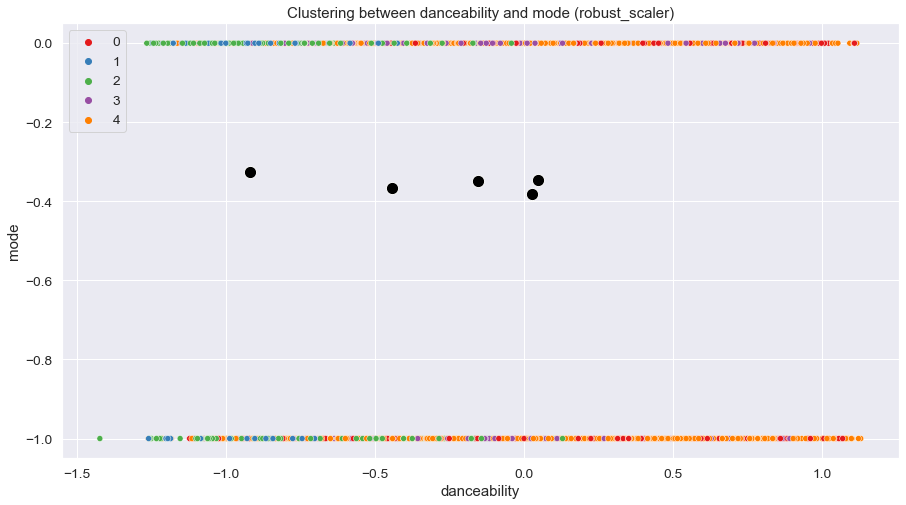

In [38]:
# KMeans standard scaler
from sklearn.cluster import KMeans
df_audio_filtered_Kmeans_new_robust = KMeans(n_clusters = 5).fit(df_audio_filtered_robust)
print(df_audio_filtered_Kmeans_new_robust)

scaled_audio_df_robust["cluster_new_robust"] = df_audio_filtered_Kmeans_new_robust.labels_
scaled_audio_df_robust.head()


# centroid
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
centroids_new_robust = df_audio_filtered_Kmeans_new_robust.cluster_centers_
centroids_new_robust = pd.DataFrame(centroids_new_robust)
centroids_new_robust.columns = columns
centroids_new_robust.head()

# Euclidean (by default)
euclidean_distance_robust = pd.DataFrame(pairwise_distances(centroids_new_robust), index=centroids_new_robust.index,
                                  columns=centroids_new_robust.index)


fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(euclidean_distance_robust)

#dancability and mode -robust graph
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_robust, x='danceability', y='mode', hue='cluster_new_robust', palette='Set1')
sns.scatterplot(data=centroids_new_robust, x='danceability', y='mode', color='black', s=150)
plt.title("Clustering between danceability and mode (robust_scaler)")
plt.show()

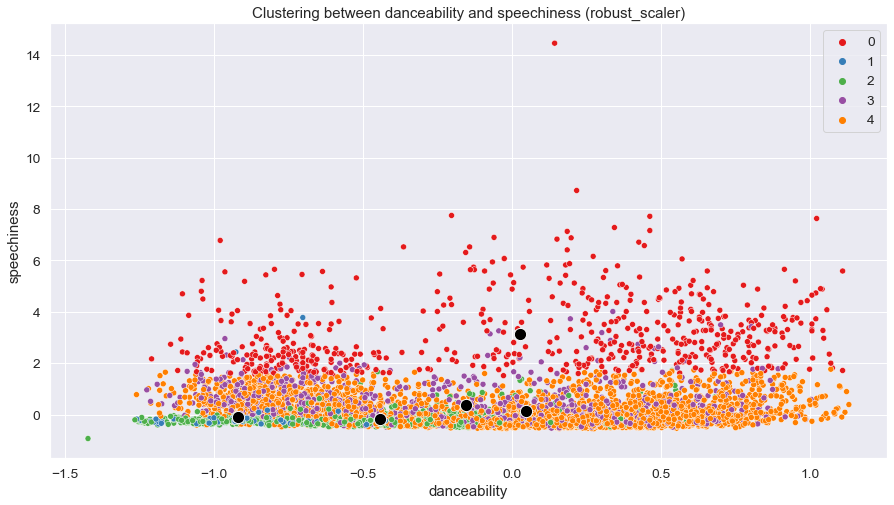

In [39]:
#dancability and acousticness -robust graph
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_robust, x='danceability', y='speechiness', hue='cluster_new_robust', palette='Set1')
sns.scatterplot(data=centroids_new_robust, x='danceability', y='speechiness', color='black', s=150)
plt.title("Clustering between danceability and speechiness (robust_scaler)")
plt.show()

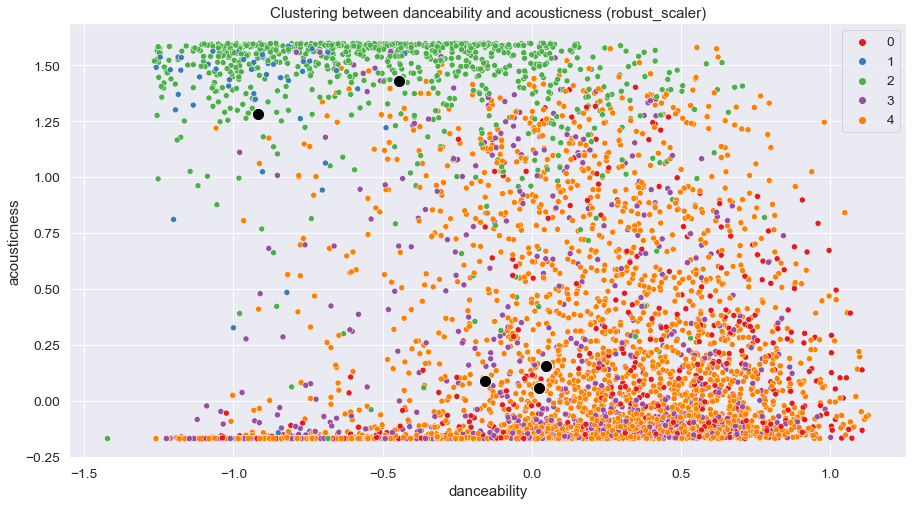

In [40]:
# dancability and acousticness -robust graph
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=scaled_audio_df_robust, x='danceability', y='acousticness', hue='cluster_new_robust', palette='Set1')
sns.scatterplot(data=centroids_new_robust, x='danceability', y='acousticness', color='black', s=150)
plt.title("Clustering between danceability and acousticness (robust_scaler)")
plt.show()

In [41]:
# grouping songs based on the cluster and checking number of songs in each cluster - robust scaler
clustered_robust_songs= (
scaled_audio_df_robust.reset_index()
    .groupby(['cluster_new_robust'])
    .agg({'name':'count'}) 
    .reset_index()
    .sort_values('name', ascending=False)
)
clustered_robust_songs
# renaming the coloumns
clustered_robust_songs.rename(columns = {'name':'model_3(robust)', 'cluster_new_robust':'cluster'}, inplace = True)

clustered_robust_songs

,cluster,model_3(robust)
4,4,2826
3,3,929
2,2,831
0,0,600
1,1,49


# silhoutte scores for robust scaler

In [42]:
# silhoutte scores for standard scaler
# for robust scaler
from sklearn.metrics import silhouette_score
silhouette_score(df_audio_filtered_robust, df_audio_filtered_Kmeans_new_robust.labels_)

0.19958245357598342

# Clustered songs based on the models

In [43]:
# merging all the dataframes for clustered songs
clustered_songs_info = clustered_minmax_songs.merge(clustered_standard_songs, how ='right').merge(clustered_robust_songs,how ='right')
clustered_songs_info.sort_values("cluster")

,cluster,model_1(minmax),model_2(standard),model_3(robust)
3,0,393,232,600
4,1,1823,1696,49
2,2,815,1164,831
1,3,1058,615,929
0,4,658,1040,2826


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

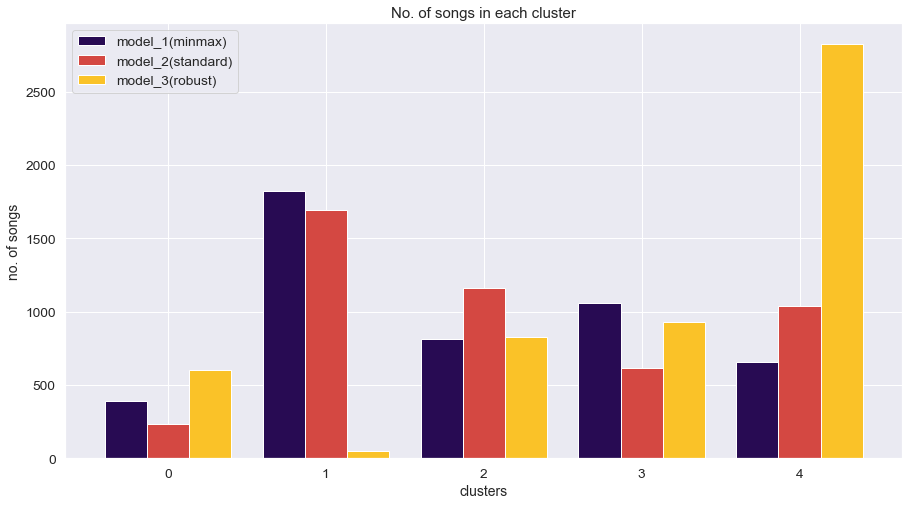

In [44]:
# Data Visualisation
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

# plot data in grouped manner of bar type
cmap = ListedColormap(sns.color_palette('inferno')) 
clustered_songs_info.sort_values("cluster").plot(x='cluster',
        kind='bar',
        stacked=False,
        width = 0.8,
        figsize=(15,8),
        cmap= cmap,
        title='No. of songs in each cluster')
plt.xlabel('clusters', fontsize=14 , )
plt.ylabel('no. of songs', fontsize=14)
plt.xticks(rotation = 360)


# MIN MAX Playlist

In [45]:
cluster_0_songs_minmax = scaled_audio_df_minmax.query('cluster_new_minmax == 0')
cluster_0_songs_minmax.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_minmax,cluster_new_minmax
name,artist,,,,,,,,,,,,,,,
Manada,Bagunço,0.650983,0.484978,0.818182,0.565768,0.0,0.063643,0.116583,0.707614,0.123008,0.741406,0.410084,0.627965,0.5,16,0
Paranoid Android,Brad Mehldau,0.357190,0.573153,0.636364,0.513756,0.0,0.081565,0.672362,0.899492,0.132507,0.102711,0.361198,0.826819,0.5,10,0
Shadows,Au Revoir Simone,0.398056,0.612230,0.272727,0.609861,0.0,0.043160,0.188945,0.582741,0.120754,0.598089,0.758510,0.339301,0.5,5,0
Oats In The Water,Ben Howard,0.333996,0.474958,0.181818,0.635072,0.0,0.023043,0.276382,0.461929,0.285139,0.077163,0.528109,0.430350,0.5,5,0
How to Disappear Completely,Radiohead,0.117517,0.301614,0.545455,0.560522,0.0,0.043160,0.316583,0.802030,0.159556,0.189947,0.367737,0.522274,0.5,14,0


In [46]:
cluster_1_songs_minmax = scaled_audio_df_minmax.query('cluster_new_minmax == 1')
cluster_1_songs_minmax.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_minmax,cluster_new_minmax
name,artist,,,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.751491,0.398807,0.181818,0.526649,1.0,0.043892,0.218090,0.000002,0.154725,0.696749,0.510537,0.256812,0.5,2,1
Brigas Nunca Mais,Paula Morelenbaum,0.698476,0.546099,0.909091,0.567054,1.0,0.063643,0.400000,0.077157,0.228788,0.642746,0.789910,0.276439,0.5,13,1
Previsao,Bossacucanova,0.676386,0.864731,0.090909,0.684850,1.0,0.057059,0.644221,0.363452,0.206247,0.533700,0.355033,0.239486,0.5,7,1
Samba de Verão,Marcos Valle,0.701789,0.404819,0.000000,0.460966,1.0,0.033285,0.817085,0.000159,0.510546,0.854606,0.447165,0.190547,0.5,7,1
Nova Bossa Nova,Marcos Valle,0.592445,0.739483,0.727273,0.595817,1.0,0.082663,0.525628,0.736041,0.217517,0.891993,0.324129,0.344833,0.5,24,1


In [47]:
cluster_2_songs_minmax = scaled_audio_df_minmax.query('cluster_new_minmax == 2')
cluster_2_songs_minmax.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_minmax,cluster_new_minmax
name,artist,,,,,,,,,,,,,,,
Under Your Spell,Desire,0.563729,0.599204,0.727273,0.609759,1.0,0.039503,0.027839,0.658883,0.133473,0.469311,0.389556,0.425537,0.5,24,2
La Nueva Reconquista de Graná,Grupo De Expertos Solynieve,0.184891,0.640286,0.818182,0.705492,1.0,0.088881,0.415075,0.766497,0.131702,0.544086,0.769419,0.331575,0.0,3,2
"Que No Sea Kang, Por Favor",Los Planetas,0.412414,0.493996,0.181818,0.648946,1.0,0.019386,0.000229,0.867005,0.240058,0.213833,0.317790,0.404855,0.5,12,2
Your Fucking Sunny Day,Lambchop,0.350563,0.491992,0.000000,0.702447,1.0,0.014265,0.073467,0.595939,0.539527,0.207602,0.383129,0.350966,0.5,12,2
San Francisco,Foxygen,0.308593,0.552111,0.727273,0.599168,1.0,0.072056,0.000081,0.625381,0.077604,0.481774,0.487699,0.241681,0.5,3,2


In [48]:
cluster_3_songs_minmax = scaled_audio_df_minmax.query('cluster_new_minmax == 3')
cluster_3_songs_minmax.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_minmax,cluster_new_minmax
name,artist,,,,,,,,,,,,,,,
Blue Bossa - Remastered,Joe Henderson,0.462116,0.432874,0.454545,0.619268,0.0,0.111924,0.611055,0.704569,0.156336,0.908609,0.245253,0.384776,0.5,1,3
Aqua De Coco,Marcos Valle,0.765849,0.732469,0.909091,0.629725,0.0,0.158010,0.489447,0.000924,0.713412,0.824489,0.280726,0.411268,0.5,6,3
Mas Que Nada,Rio Combo,0.614535,0.539085,0.454545,0.525194,0.0,0.031456,0.156784,0.002173,0.283529,0.928341,0.284564,0.235850,0.5,6,3
Chega De Saudade,João Gilberto,0.402474,0.244500,0.363636,0.413725,0.0,0.040600,0.738693,0.000000,0.286749,0.689480,0.826333,0.143227,0.5,15,3
Rebel Rebel,Seu Jorge,0.787939,0.205423,0.545455,0.424690,0.0,0.111192,0.883417,0.000318,0.207857,0.551355,0.482105,0.216437,0.5,15,3


In [49]:
cluster_4_songs_minmax = scaled_audio_df_minmax.query('cluster_new_minmax == 4')
cluster_4_songs_minmax.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_minmax,cluster_new_minmax
name,artist,,,,,,,,,,,,,,,
Mulher Eu Sei,Chico César,0.710625,0.049313,0.363636,0.341579,1.0,0.089612,0.883417,0.000041,0.603929,0.521238,0.397299,0.247708,0.5,9,4
Rosa Morena,Kurt Elling,0.650983,0.118250,0.545455,0.284322,1.0,0.056328,0.920603,0.000348,0.149895,0.394537,0.485092,0.388865,0.5,26,4
Desafinado,Stan Getz,0.446653,0.145303,0.272727,0.362390,1.0,0.154718,0.935678,0.156345,0.154725,0.416346,0.621347,0.349654,0.5,9,4
Madalena,Maria Gasolina,0.677491,0.206425,1.000000,0.486921,0.0,0.116679,0.967839,0.420305,0.162776,0.687403,0.314896,0.181466,0.5,15,4
The Girl From Ipanema,Stan Getz,0.639938,0.139291,0.727273,0.386417,1.0,0.059985,0.871357,0.001685,0.151505,0.379998,0.537106,0.460380,0.5,26,4
